In [2]:
import pandas as pd
import numpy as np 

In [3]:
dataset = pd.read_csv("zoo.csv")
%store dataset

In [4]:
dataset.shape

(101, 18)

In [5]:
dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
dataset.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [8]:
duplicates = dataset.duplicated(['animal_name']).sum()
print(duplicates)

1


In [9]:
duplicates = dataset.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [10]:
frog = dataset.loc[dataset["animal_name"]=="frog"]
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"

<ipython-input-11-caf09b6fccbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"


In [12]:
class_dataset = pd.read_csv("class.csv")
class_dataset.shape


(7, 4)

In [13]:
class_dataset.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [14]:
p = pd.DataFrame(class_dataset, columns=['Class_Type', 'Number_Of_Animal_Species_In_Class'])
p.columns = ["Type", "Number"]
p['Percent'] = (p["Number"]/(p["Number"].sum())) * 100
p.sort_values(by=['Number'])
p

,Type,Number,Percent
0,Mammal,41,40.594059
1,Bird,20,19.801980
2,Reptile,5,4.950495
3,Fish,13,12.871287
4,Amphibian,4,3.960396
5,Bug,8,7.920792
6,Invertebrate,10,9.900990


<AxesSubplot:xlabel='Class_Type', ylabel='Number_Of_Animal_Species_In_Class'>

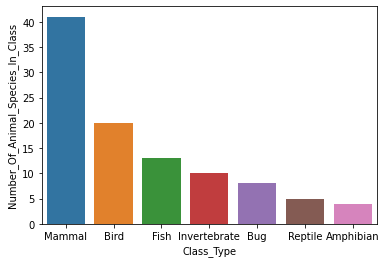

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.barplot(x='Class_Type', y='Number_Of_Animal_Species_In_Class', data=class_dataset, order=class_dataset.sort_values('Number_Of_Animal_Species_In_Class', ascending = False).Class_Type)

# sns.countplot(class_dataset['Class_Type'], order=class_dataset["Class_Type"])
# plt.show()

In [16]:
zoo_full = dataset.merge(class_dataset, how='left', left_on='class_type', right_on='Class_Number')
zoo_full.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


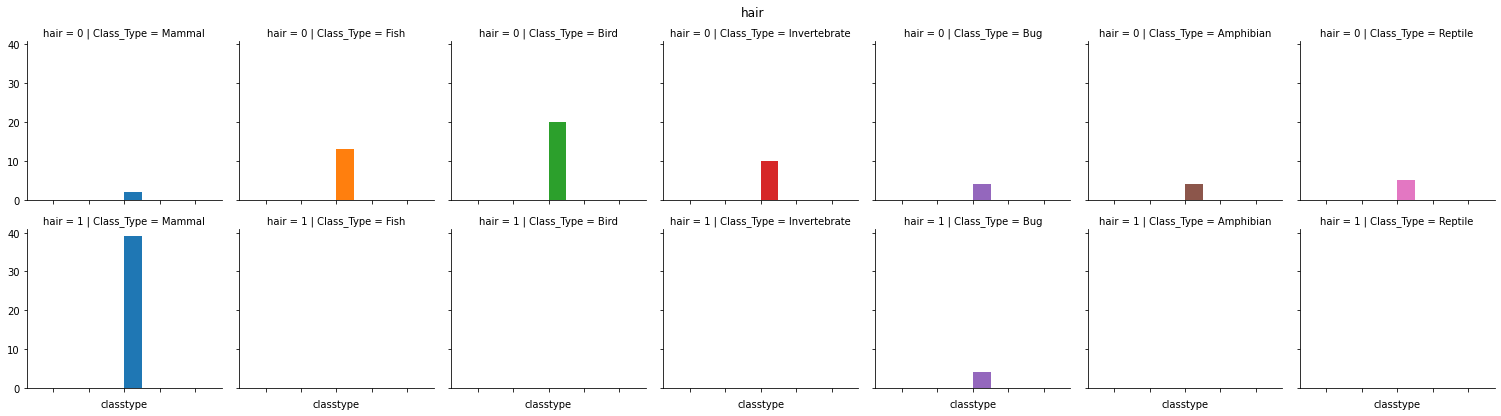

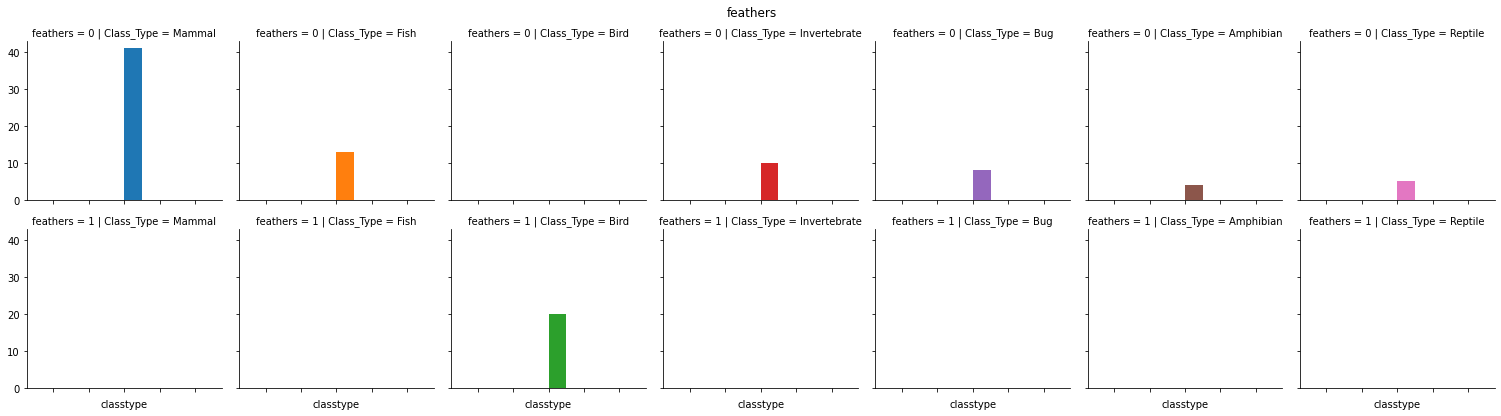

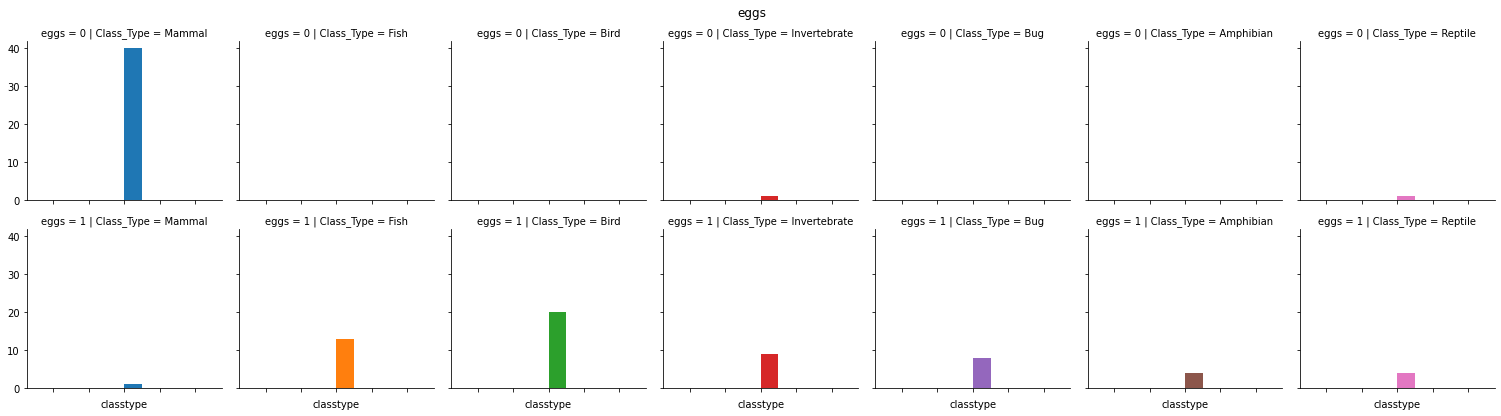

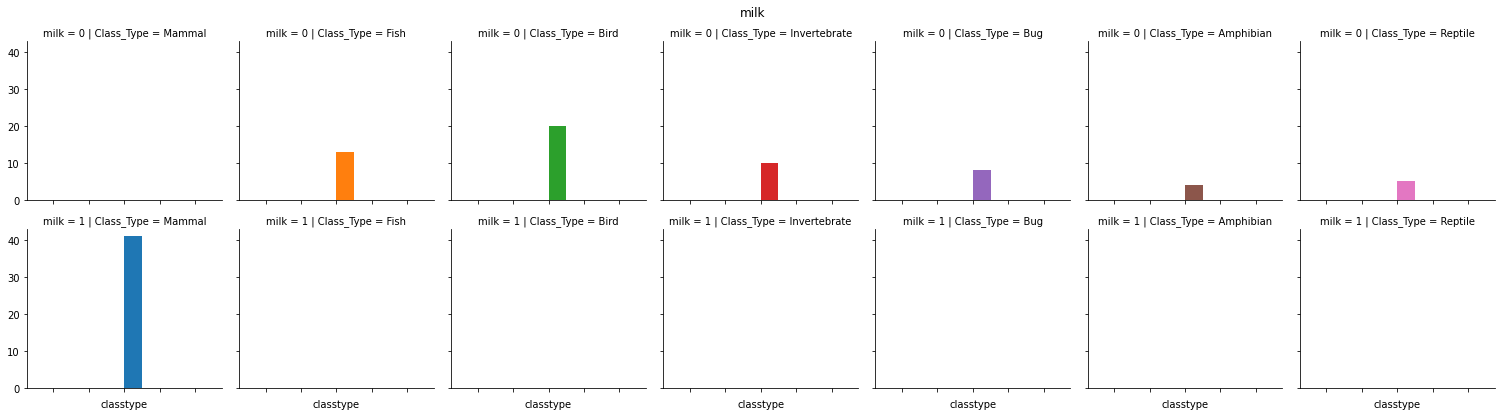

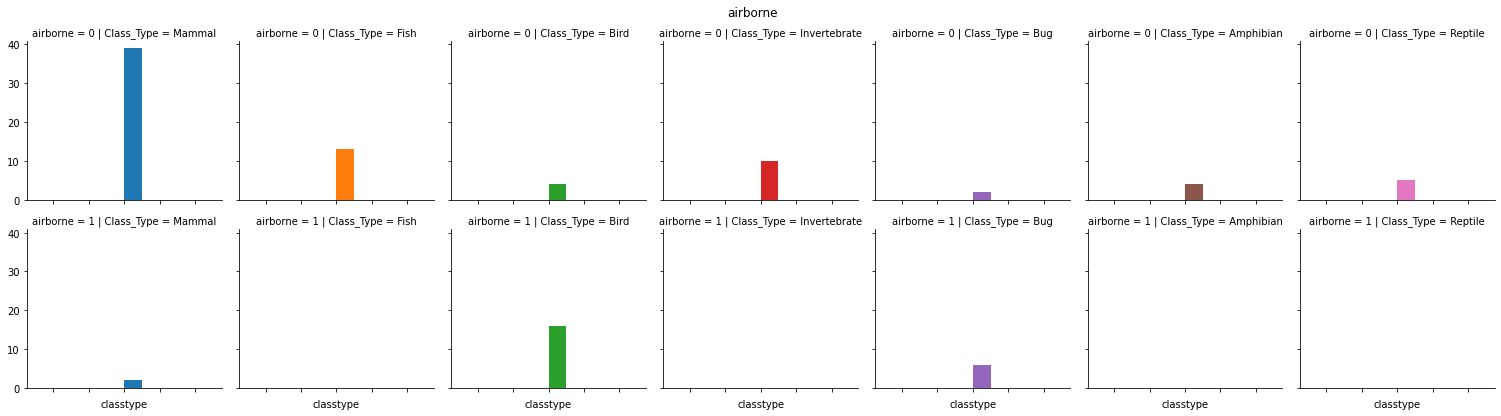

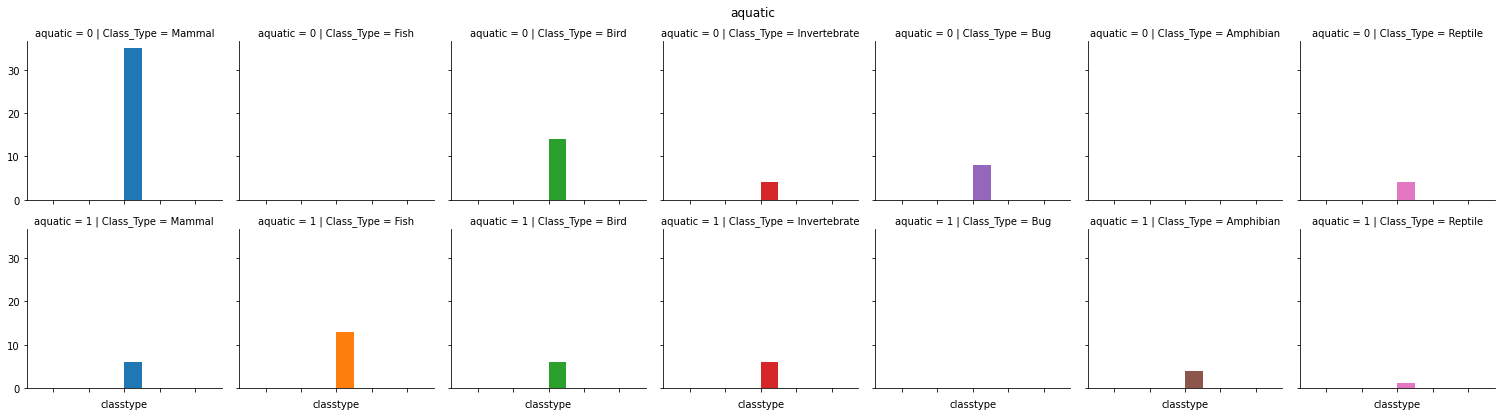

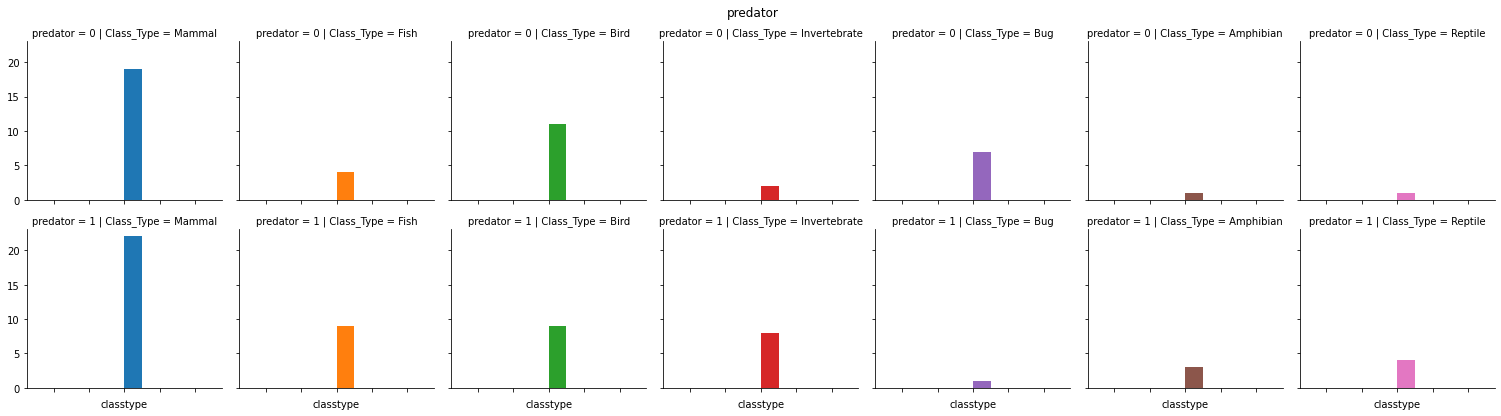

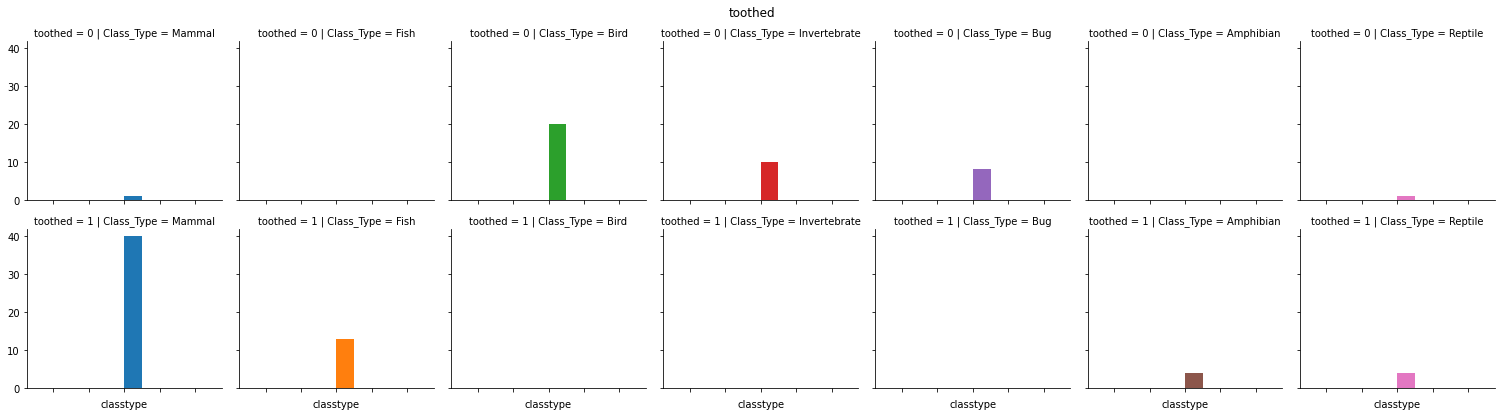

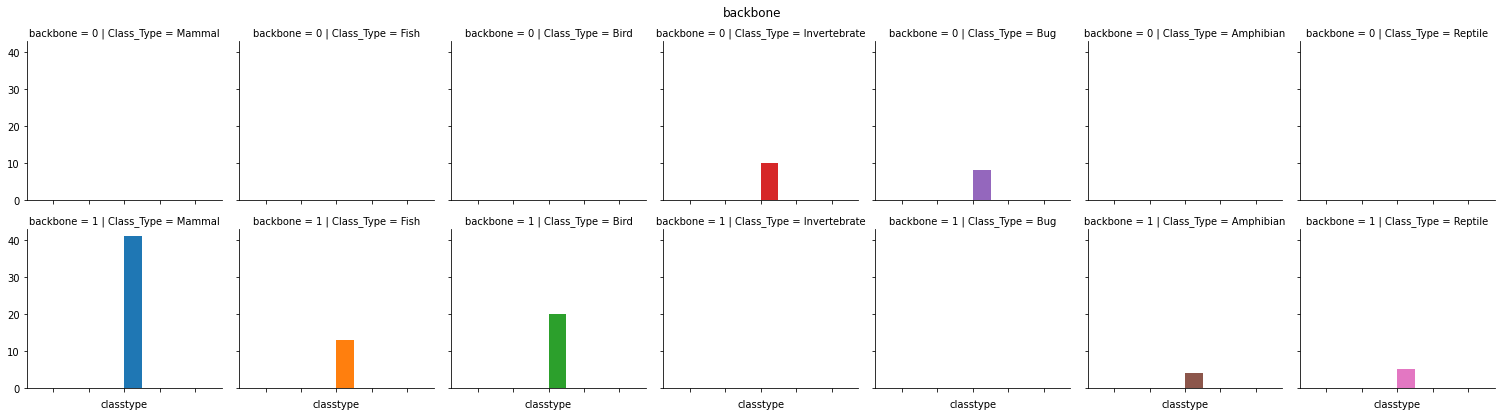

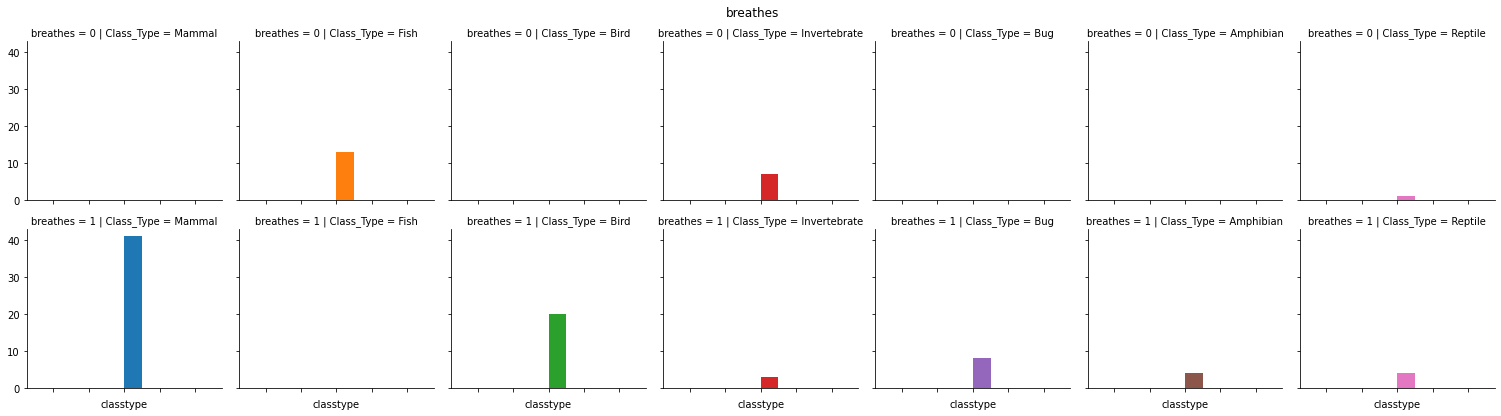

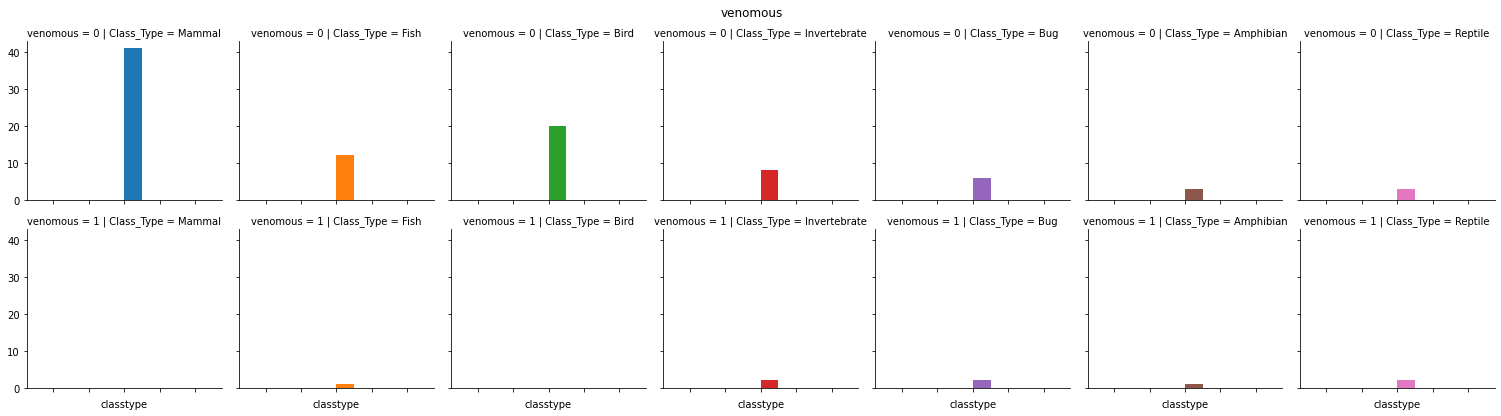

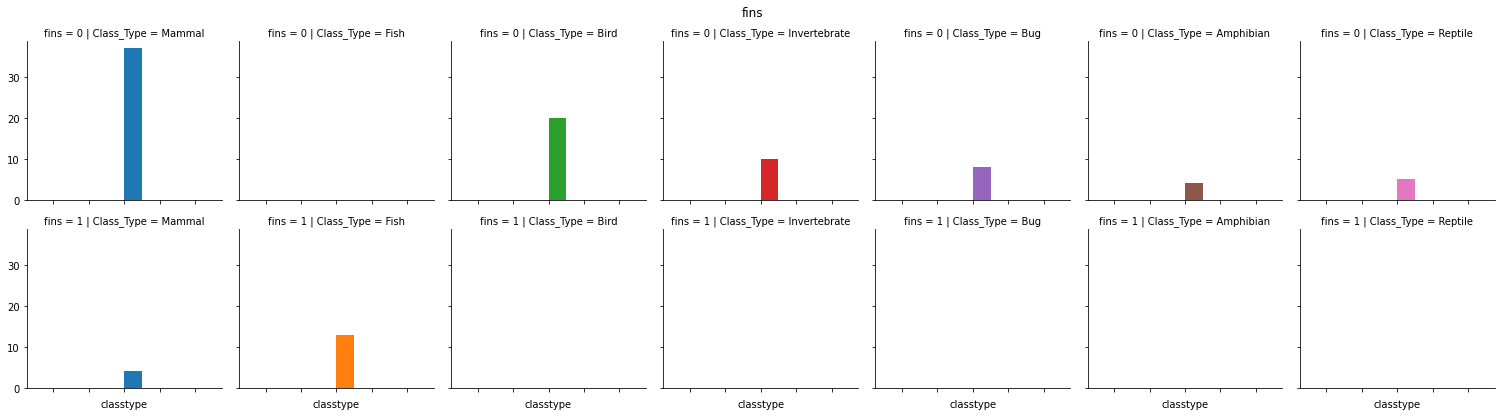

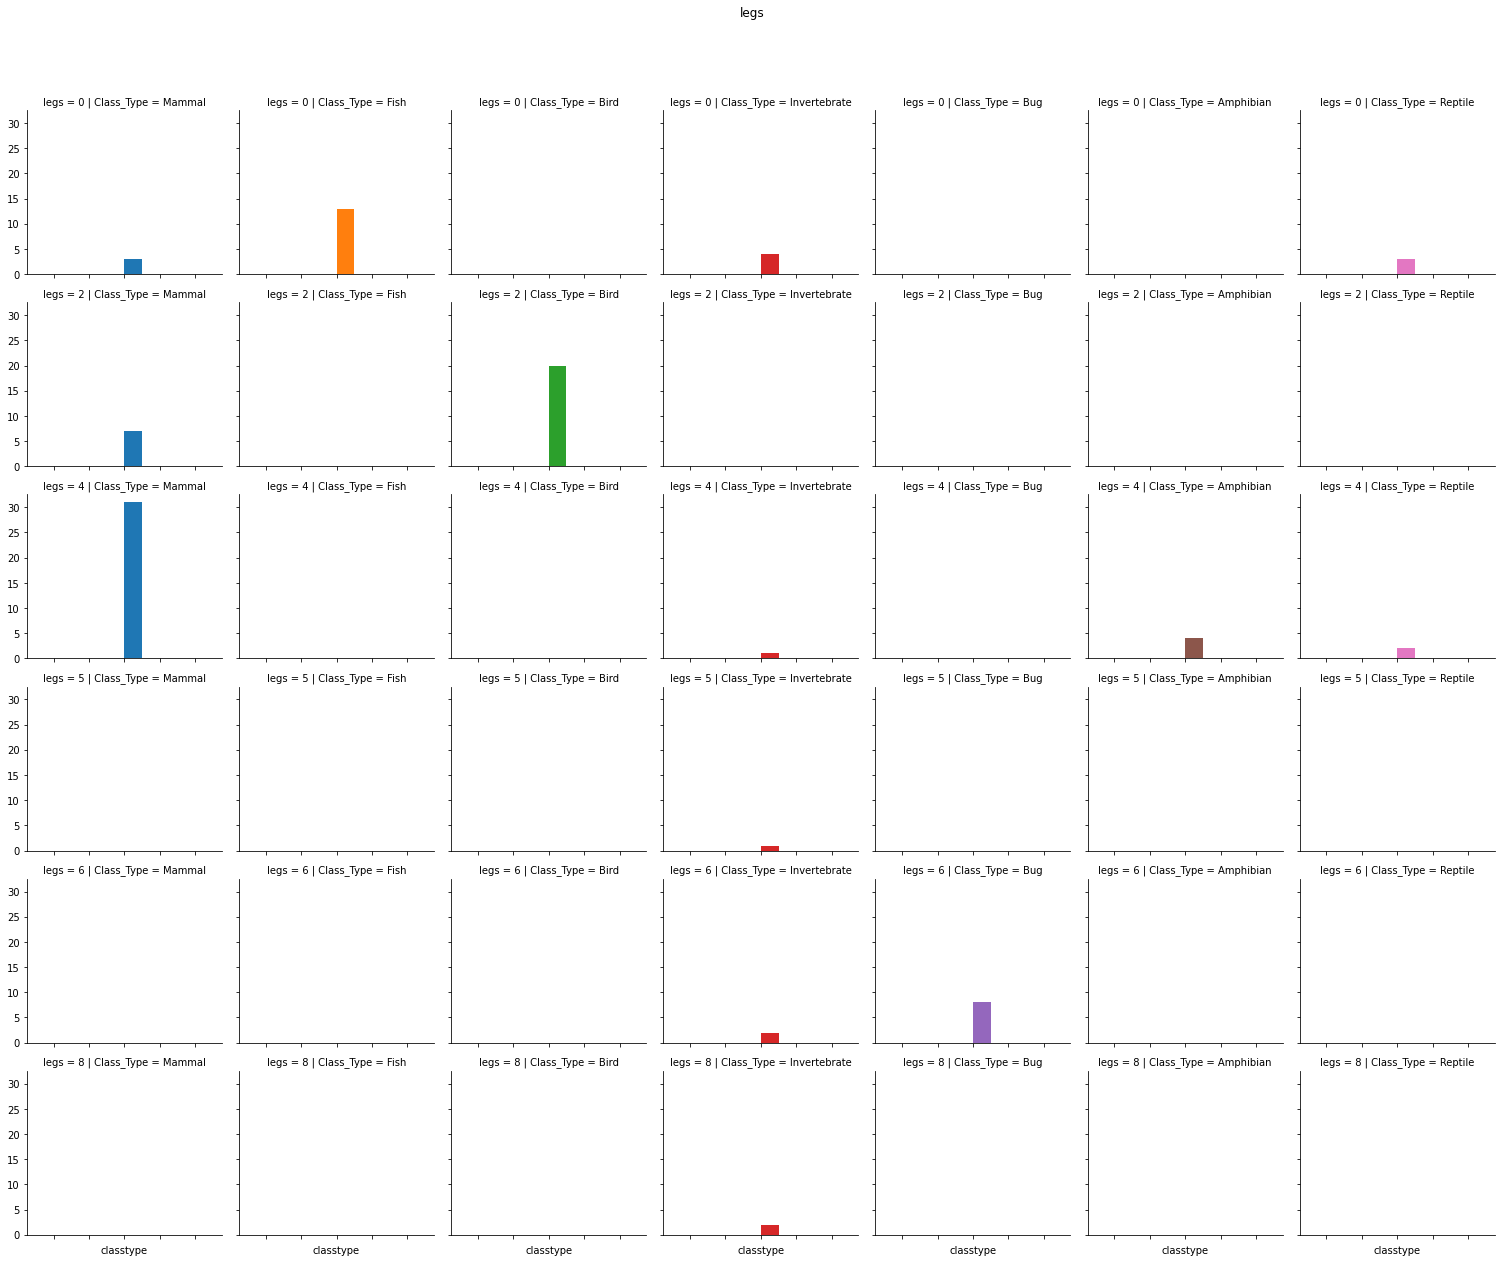

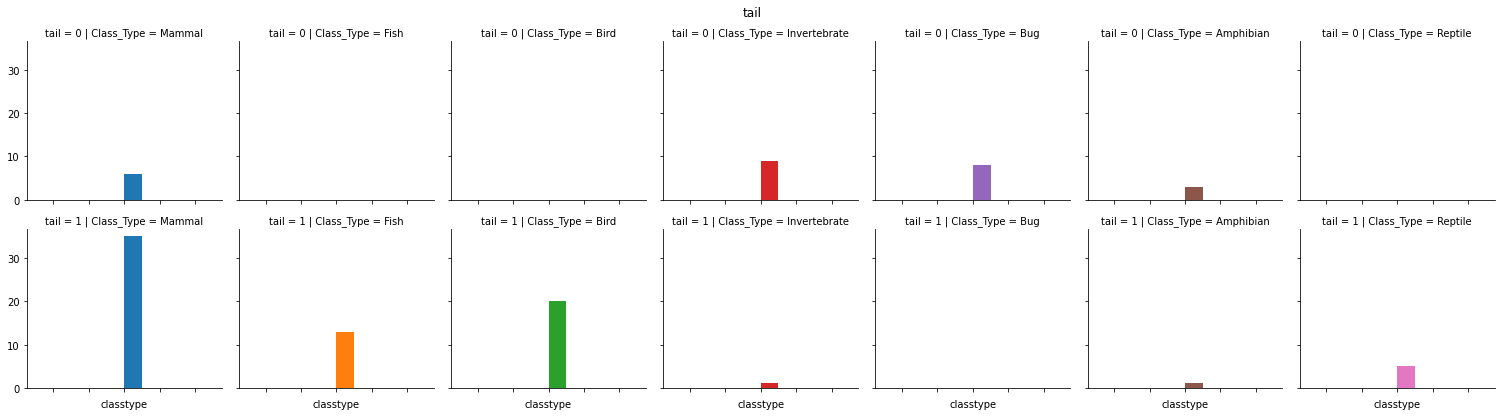

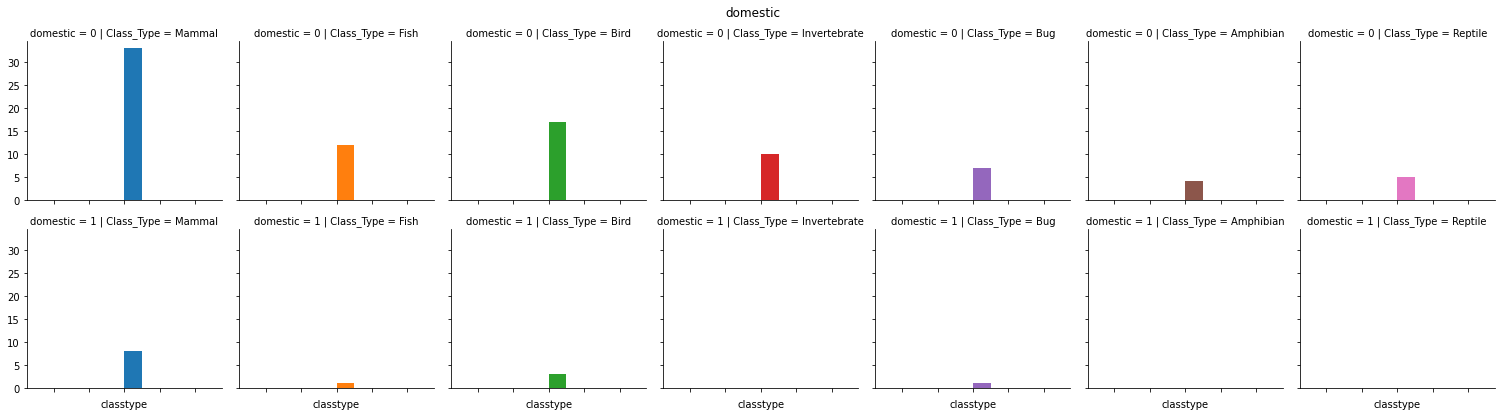

In [17]:
feature = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']
zoo_full["classtype"] = 1
for i in feature:
    g = sns.FacetGrid(zoo_full, col="Class_Type", row=i, hue="Class_Type")
    g.map(plt.hist,"classtype")
    g.set(xticklabels=[])
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(i)

<AxesSubplot:ylabel='Class_Type'>

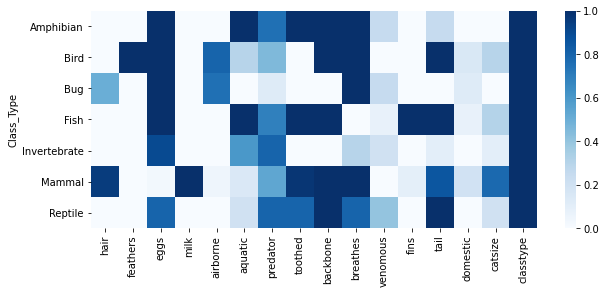

In [18]:
heat = zoo_full.groupby(by='Class_Type').mean()
heat.drop(columns=['class_type','Class_Number','Number_Of_Animal_Species_In_Class','legs'],inplace=True, axis=1)
plt.subplots(figsize=(10,4))
sns.heatmap(heat, cmap="Blues")

<AxesSubplot:xlabel='Class_Type', ylabel='legs'>

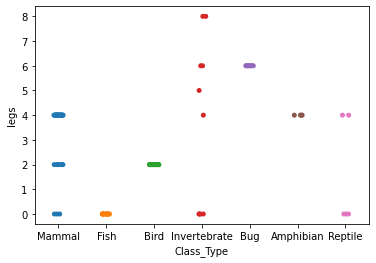

In [19]:
sns.stripplot(x=zoo_full['Class_Type'], y=zoo_full['legs'])

In [20]:
X = dataset[feature]
y = dataset['class_type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)


In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0,criterion='gini')
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.96

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  3  1]
 [ 0  0  0  0  0  0  5]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         7
           5       1.00      0.50      0.67         2
           6       1.00      0.75      0.86         4
           7       0.83      1.00      0.91         5

    accuracy                           0.96        51
   macro avg       0.93      0.89      0.89        51
weighted avg       0.97      0.96      0.96        51



In [22]:
zoo_full[['class_type', 'Class_Type']].drop_duplicates().sort_values(by='class_type')

,class_type,Class_Type
0,1,Mammal
11,2,Bird
62,3,Reptile
2,4,Fish
25,5,Amphibian
24,6,Bug
13,7,Invertebrate


In [23]:
importance = pd.DataFrame(clf.feature_importances_)
feat = pd.DataFrame(feature)

feat_imp = pd.concat([feat, importance], axis=1, ignore_index=True)
feat_imp.columns = ["Features", "Importance"]
feat_imp.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp


,Features,Importance
3,milk,0.380454
1,feathers,0.213787
11,fins,0.140239
8,backbone,0.086346
6,predator,0.069808
13,tail,0.062827
12,legs,0.046539
0,hair,0.000000
2,eggs,0.000000
4,airborne,0.000000


In [24]:
feat.columns=['Features']
feat

,Features
0,hair
1,feathers
2,eggs
3,milk
4,airborne
5,aquatic
6,predator
7,toothed
8,backbone
9,breathes


In [25]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_12 <= 3.00
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- feature_12 >  3.00
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |--- feature_11 >  0.50
|   |   |   |--- class: 4
|   |--- feature_1 >  0.50
|   |   |--- class: 2
|--- feature_3 >  0.50
|   |--- class: 1



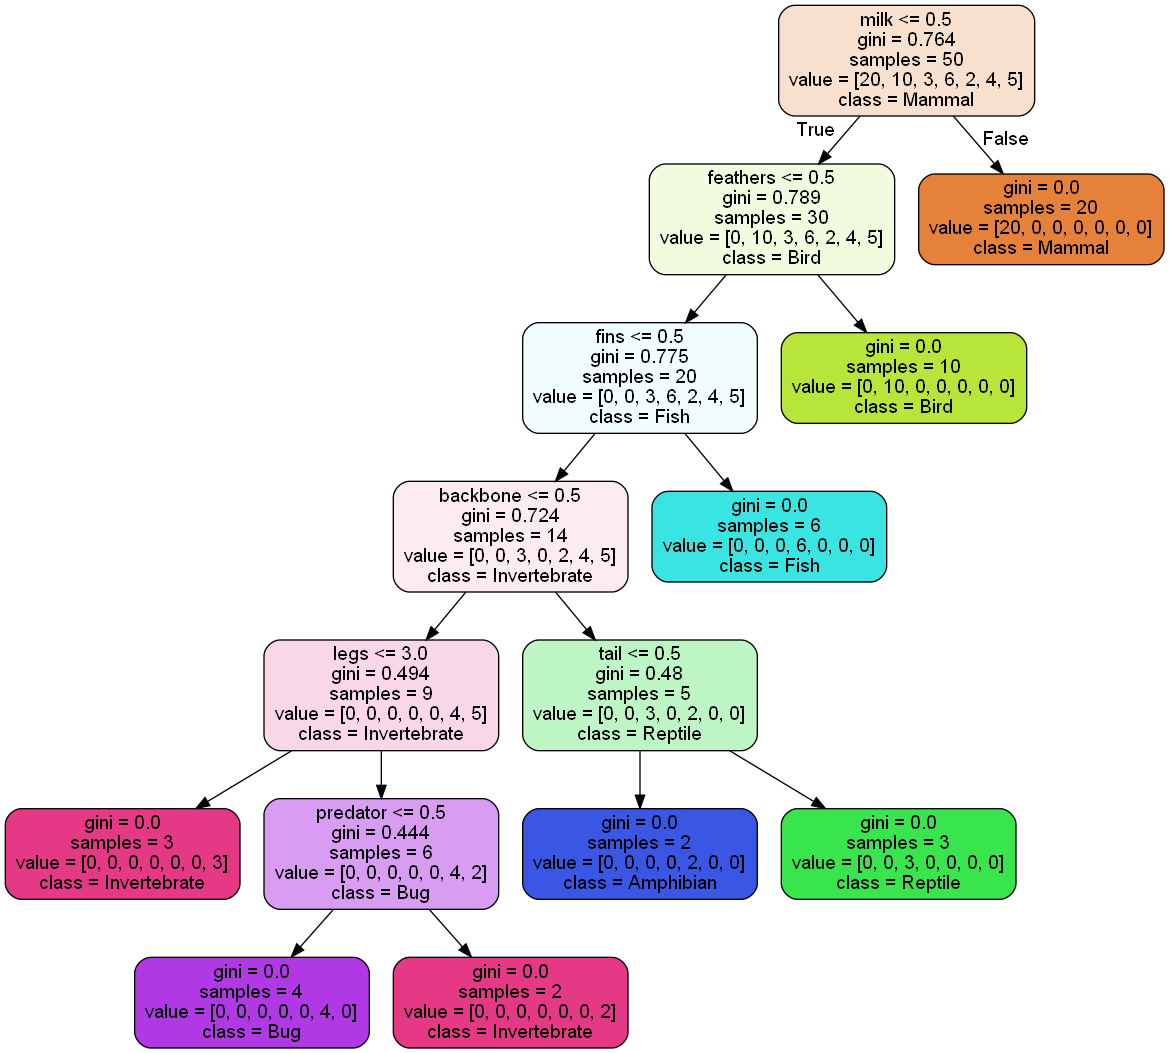

In [26]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data


global tree  
# Get the tree
tree = []
tree = clf

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

In [27]:
chosen_feat = feat_imp[feat_imp['Importance'] > 0]
visible_feat = chosen_feat['Features']
visible_feat_sorted = visible_feat.sort_index()
visible_feat_sorted

1     feathers
3         milk
6     predator
8     backbone
11        fins
12        legs
13        tail
Name: Features, dtype: object

In [28]:
X = dataset[visible_feat_sorted]
y = dataset['class_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

clf2 = DecisionTreeClassifier(random_state = 0,criterion='gini')
clf2.fit(X_train, y_train)

pred = clf2.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.96

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  3  1]
 [ 0  0  0  0  0  0  5]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         7
           5       1.00      0.50      0.67         2
           6       1.00      0.75      0.86         4
           7       0.83      1.00      0.91         5

    accuracy                           0.96        51
   macro avg       0.93      0.89      0.89        51
weighted avg       0.97      0.96      0.96        51



In [30]:
importance2 = pd.DataFrame(clf2.feature_importances_)
feat2 = pd.DataFrame(visible_feat)

feat2.reset_index(drop=True, inplace=True)

feat_imp2 = pd.concat([feat2, importance2], axis=1, ignore_index=True)
feat_imp2.columns = ["Features", "Importance"]
feat_imp2.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp2


,Features,Importance
0,milk,0.380454
1,feathers,0.213787
2,fins,0.140239
3,backbone,0.086346
6,legs,0.069808
5,tail,0.062827
4,predator,0.046539


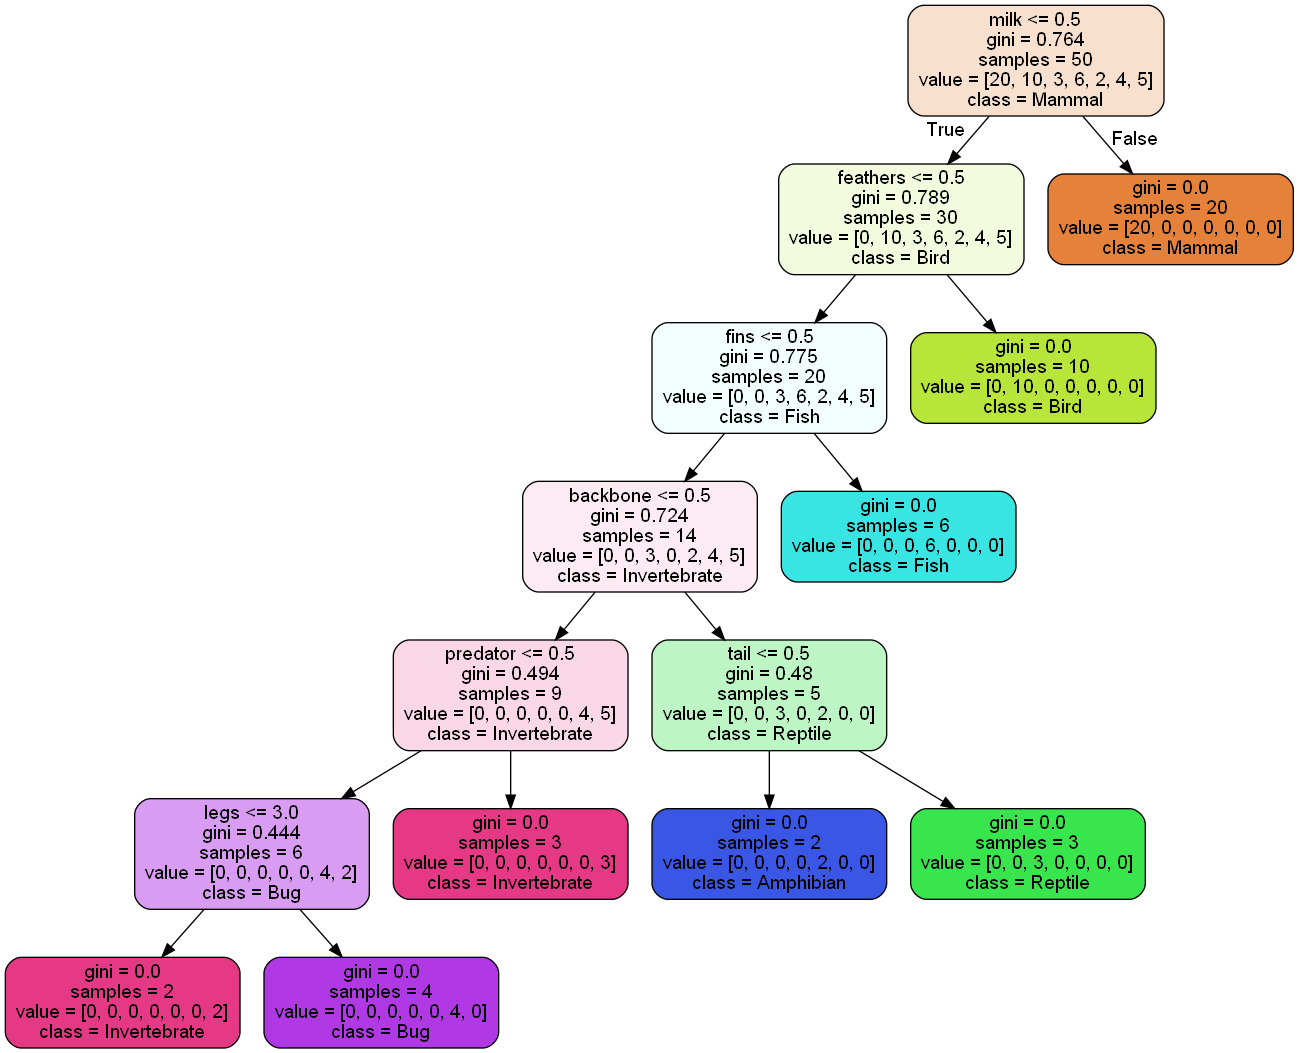

In [31]:
tree = clf2

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())